In [170]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import HTML
from IPython.display import display
import requests # library to handle requests

#Load Data; #Update 202111
df = pd.read_csv('Datasets/Assessors_Parcel_Data_2021.csv')



In [235]:
p=['PIN', 'HOUSE_NO', 'STREET_NAME', 'UNIT_NO', 'ZIP_POSTAL', 'FORMATTED_ADDRESS','OWNERNM','NEIGHBORHOOD', 'COMMUNITY','WARD', 'ZONING', 'LANDUSE', 'PARCEL_AREA_SQFT', 'PRIMARY_PROP_TYPE', 'BLDGVALUE', 'TOTALVALUE', 'IS_MULTIPLE_USES', 'IS_EXEMPT', 
   'NUM_BLDGS','BUILDINGUSE','YEARBUILT', 'NUM_STORIES', 'NUM_GAR_STALLS', 'PRIMARYHEATING','CONSTRUCTIONTYPE','EXTERIORTYPE','TOTAL_UNITS','BATHROOMS','BEDROOMS']
a=df[p]

cols=['TID','Add_No','Add_Street','Add_Unit','Zip', 'address','Owner','Neighborhood', 'Community', 'Ward','Zoning','LandUse','Area','Property_Type', 'BLD_Val', 'Total_Val', 
     'Mult_Use','Is_Exempt','Num_Bldgs','Bldg_Use','YearBuilt','Num_Stories','Num_Garage','Heating','Construction','Exterior','Tot_Units', 'Bathrooms','Bedrooms']
a.columns= cols

a['address']= a['address'].str.strip()
#a['address']= a['address'].str.replace(' P1',' #1')
#a['address']= a['address'].str.replace(' P2',' #2')
#a['address']= a['address'].str.replace(' P3',' #3')
#a['address']= a['address'].str.replace(' P4',' #4')
a['Zip5'] = a['Zip'].str[:5]

#a.head(4)
#a.query('Add_Unit=="P3217"')

In [274]:
a['dex']=1
p=['dex', 'TID']

h=a[p].groupby(['TID']).sum()
h.dex.unique()
h.query('dex>1')

#132 double entries; 5 tri[le entries], 3 entrie,2, 2 

,dex
TID,


In [257]:
#Load Data
ef = pd.read_csv('Datasets/Active_Rental_Licenses.csv')

p=['X','Y', 'apn','category','status','licenseNumber','milestone','tier','issueDate', 'expirationDate', 'address', 'ownerName', 'ownerAddress1', 'ownerAddress2', 'ownerState', 'ownerPhone', 'ownerEmail', 'applicantName', 'applicantPhone', 'applicantEmail', 'licensedUnits', 'ward', 'neighborhoodDesc', 'communityDesc', 'latitude', 'longitude']       
ren=ef[p]
cols= ['X','Y', 'TID','category','status','licenseNumber','milestone','tier','issueDate', 'expirationDate', 'address', 'ownerName', 'ownerAddress1', 'ownerAddress2', 'ownerState', 'ownerPhone', 'ownerEmail', 'applicantName', 'applicantPhone', 'applicantEmail', 'licensedUnits', 'ward', 'neighborhoodDesc', 'communityDesc', 'latitude', 'longitude']
ren.columns= cols


from datetime import datetime

ren['ExpDate']= pd.to_datetime(ren['expirationDate']) # Create new column called DateTime
ren['ExpYear']= ren['ExpDate'].dt.year #create year column
ren['ExpMonth']= ren['ExpDate'].dt.month
ren['ExpDay']= ren['ExpDate'].dt.day
ren['LicExpDate']='03/01/' + ren['ExpYear'].astype(str)

ren['IssDate']= pd.to_datetime(ren['issueDate']) # Create new column called DateTime
ren['IssYear']= ren['IssDate'].dt.year #create year column
ren['IssMonth'] = ren['IssDate'].dt.month # Create Month Category
ren['IssDay'] = ren['IssDate'].dt.day #Create Day of the Current month
ren['LicIssueDate']= ren['IssMonth'].astype(str) + '/' + ren['IssDay'].astype(str) + '/' + ren['IssYear'].astype(str)


#Duplicate Licenses
# LIC386276,LIC389668, LIC396985, LIC397106

ren = ren.drop_duplicates(keep=False)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
bad= ren.query('ExpYear<2021') #outdate records
ren= ren.query('ExpYear>2021')
ren= ren[~ren['TID'].str.contains('A')]
ren['TID'] = ren['TID'].astype(np.int64)



#ren['TID'] = ren['TID'].astype(np.int64)


ren.head(4)

,X,Y,TID,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,...,ExpDate,ExpYear,ExpMonth,ExpDay,LicExpDate,IssDate,IssYear,IssMonth,IssDay,LicIssueDate
0,-93.307754,44.895922,2102824320092,CONV,Active,LIC385097,Active,Tier 1,2019/11/07 10:03:49+00,2023/03/01 00:00:00+00,...,2023-03-01 00:00:00+00:00,2023,3,1,03/01/2023,2019-11-07 10:03:49+00:00,2019,11,7,11/7/2019
1,-93.290564,45.046278,1211821240019,CONV,Active,LIC375543,Active,Tier 1,2019/01/07 08:11:35+00,2023/03/01 00:00:00+00,...,2023-03-01 00:00:00+00:00,2023,3,1,03/01/2023,2019-01-07 08:11:35+00:00,2019,1,7,1/7/2019
2,-93.287601,45.017718,1002924220117,CONVEXEMPT,Active,LIC392965,License Re,Tier 1,2021/07/02 10:00:43+00,2022/03/01 00:00:00+00,...,2022-03-01 00:00:00+00:00,2022,3,1,03/01/2022,2021-07-02 10:00:43+00:00,2021,7,2,7/2/2021
3,-93.305824,44.980465,2102924330058,CHOWN,Active,LIC392462,Active,Tier 1,2020/12/23 16:57:30+00,2023/03/01 00:00:00+00,...,2023-03-01 00:00:00+00:00,2023,3,1,03/01/2023,2020-12-23 16:57:30+00:00,2020,12,23,12/23/2020


In [378]:
ren['dex']=1
p=['dex', 'TID']

h=ren[p].groupby(['TID']).sum()
h.dex.unique()
Sin=h.query('dex==1')
Sin=Sin.reset_index()

Mult=h.query('dex>1')
Mult=Mult.reset_index()

S1= pd.merge(ren, Sin, on='TID', how='right')
#S1.shape #21166
#ren.shape #21908
Mult

M1= pd.merge(ren, Mult, on='TID', how='right')
M1.shape #742
M1

#S1[S1['dex'].isnull()] 

#77 double; 1621 6TH ST NE #triple; 
#ren[ren['address'].str.contains('1300 LAKE ST W', na=False)]


p=['apn','category', 'licenseNumber','issueDate', 'expirationDate', 'address', 'ownerName', 'ownerAddress1', 'ownerAddress2', 'ownerState', 'ownerPhone', 'ownerEmail', 'applicantName', 'applicantPhone', 'applicantEmail']       
reny=ef[p]
cols= ['TID', 'category','licenseNumber','issueDate', 'expirationDate', 'address', 'ownerName', 'ownerAddress1', 'ownerAddress2', 'ownerState', 'ownerPhone', 'ownerEmail', 'applicantName', 'applicantPhone', 'applicantEmail']   
reny.columns= cols


#-93.307754	44.895922	2102824320092
#reny.query("licenseNumber=='LIC395570'")
#reny.query("TID=='0202824120056'")
#a.query("TID=='0202824120056'")
#ren["TID"].str.find('B')
##ren.query(X)

#a[a['address'].str.contains('4815 28TH AVE', na=False)]

#LIC394538
#LIC399856
#1302824140210

,TID,category,licenseNumber,issueDate,expirationDate,address,ownerName,ownerAddress1,ownerAddress2,ownerState,ownerPhone,ownerEmail,applicantName,applicantPhone,applicantEmail
13451,0202824120056,CHOWNEXMPT,LIC255924,2001/11/30 00:00:00+00,2023/03/01 00:00:00+00,3048 13TH AVE S,NOEL W VOGEN,508 NATCHEZ AVE S,NaN,MN,(952)377-6525,NVOGEN@MSN.COM,NOEL W VOGEN,(952)377-6525,NVOGEN@MSN.COM
15491,0202824120056,CHOWNEXMPT,LIC313603,2001/11/30 00:00:00+00,2023/03/01 00:00:00+00,3048 13TH AVE S,NOEL W VOGEN,508 NATCHEZ AVE S,NaN,MN,(952)377-6525,NVOGEN@MSN.COM,NOEL W VOGEN,(952)377-6525,NVOGEN@MSN.COM


In [374]:
#The Whittle algorithm, find patterns and cut the number of unlinked entries each session

#Prepare Parcel Data
dols= ['address','Add_No','TID']
Hen=a[dols]
Hen['index'] = range(1, len(Hen) + 1) #create Index variable

#Prepare Rental Data
test=['LicExpDate', 'address','TID','licenseNumber']
m= S1[test]

#Merge and the null list shows what are left unmatched
Mas1= pd.merge(Hen, m, on='TID', how='right')
gy=Mas1[Mas1['address_x'].isnull()] 
#m.dty

#141 missing hits


#Prepare Rental Data
test=['LicExpDate', 'address','TID', 'category','licenseNumber']
m= M1[test]
m=m.query("category!='ShrtTrmLic'")

#Merge and the null list shows what are left unmatched
Mas2= pd.merge(Hen, m, on=['TID','address'], how='right')
MW=Mas2[Mas2['Add_No'].notnull()] 

# 185 filled

#495 left

ly=Mas2[Mas2['Add_No'].isnull()] 
test1=['LicExpDate', 'address','TID','licenseNumber']
Mas3= pd.merge(Hen, ly, on='address', how='right')
wy=Mas3[Mas3['Add_No_x'].notnull()]
wy['TID']=wy['TID_x']





#ay=pd.merge(M1, ly, on=['licenseNumber'], how='right')
#ay['address']= ay['address_x']
#ay=ay[test]

#Mas3=pd.merge(Hen, ay, on='address', how='right')
#Mas3[Mas3['Add_No_x'].isnull()] 

#301 left
#193 catched
y=Mas3[Mas3['Add_No_x'].notnull()] 


#1063 [Final Number]

k1=Mas1[Mas1['address_x'].notnull()]
plug=['TID','licenseNumber']
key1= k1[plug]

key2=MW[plug]

key3=wy[plug]

KFin=pd.concat([key1,key3,key2], ignore_index=True)
KFin=KFin.drop_duplicates()
KFin

KFin.shape





#m.shape


#Mas1.shape
#ren.shape


KFin['dex']=1
p=['dex', 'TID']

h=KFin[p].groupby(['TID']).sum()
h.dex.unique()
h.query('dex>1')

#h=h.reset_index()

#pd.merge(ren, h, on='TID', how='right')

#gy

#LIC313603
#LIC255924



,address,Add_No,TID,index,LicExpDate,category,licenseNumber
0,2818 38TH ST E,2818,102824440058,2647.0,03/01/2022,CHOWNEXMPT,LIC159619
1,3146 18TH AVE S,3146,202824140052,5638.0,03/01/2022,CHOWNEXMPT,LIC121904
2,3048 13TH AVE S,3048,202824120056,5694.0,03/01/2023,CHOWNEXMPT,LIC255924
3,3048 13TH AVE S,3048,202824120056,5694.0,03/01/2023,CHOWNEXMPT,LIC313603
4,3322 15TH AVE S,3322,202824130115,5717.0,03/01/2023,CONVEXEMPT,LIC394953
5,3343 16TH AVE S,3343,202824140014,5750.0,03/01/2022,CHOWNEXMPT,LIC112886
6,3112 ELLIOT AVE,3112,202824210100,6331.0,03/01/2022,CHOWNEXMPT,LIC392522
7,3517 OAKLAND AVE,3517,202824320014,7189.0,03/01/2023,CHOWNEXMPT,LIC151144
8,3649 ELLIOT AVE,3649,202824340230,7652.0,03/01/2023,CHOWNEXMPT,LIC117076
9,3637 ELLIOT AVE,3637,202824340215,7799.0,03/01/2022,CHOWNEXMPT,LIC337765


In [172]:
#Merging Strategy





#The Whittle algorithm, find patterns and cut the number of unlinked entries each session

#Prepare Parcel Data
dols= ['address','Zip5','ID']
Hen=a[dols]
Hen['index'] = range(1, len(Hen) + 1) #create Index variable

#Prepare Rental Data
test=['LicExpDate', 'address','licenseNumber','TID']
m= ren[test]

#Merge and the null list shows what are left unmatched
Mas1= pd.merge(Hen, m, on='address', how='right')
ty=Mas1[Mas1['Zip5'].isnull()] 

#3381 missing

ty= ty[test]
ty['address']= ty['address'].str.replace(' ST NE',' ST')
ty['address']= ty['address'].str.replace(' ST SE',' ST')
ty['address']= ty['address'].str.replace(' ST E',' ST')
ty['address']= ty['address'].str.replace(' ST W',' ST')
Mas2= pd.merge(Hen, ty, on='address', how='right')
sy= Mas2[Mas2['Zip5'].isnull()]

#1938
sy= sy[test]
sy['address']= sy['address'].str.replace(' NE','')
sy['address']= sy['address'].str.replace(' SE','')
Mas3= pd.merge(Hen, sy, on='address', how='right')
ry= Mas3[Mas3['Zip5'].isnull()]

#1722
ry=ry[test]
ry['address']= ry['address'].str.replace(' E','')
ry['address']= ry['address'].str.replace(' W','')
ry['address']= ry['address'].str.replace(' N','')
ry['address']= ry['address'].str.replace(' S','')
ry['address']= ry['address'].str.replace('STT','ST')
Mas4=pd.merge(Hen, ry, on='address', how='right')
gy=Mas4[Mas4['Zip5'].isnull()]

#1153

#Here I do a reset on the values that are remaining because they are impacted by the replace
va=pd.merge(m, gy, on='licenseNumber', how='right')


col=['LicExpDate_x','address_x','licenseNumber']
v1=va[col]
cols=['LicExpDate','address','licenseNumber']
v1.columns= cols

v1['address']= v1['address'].str.replace(' S','')
Mas5=pd.merge(Hen, v1, on='address', how='right')
hy=Mas5[Mas5['Zip5'].isnull()]
#1122

#Reset Once again
va=pd.merge(m, hy, on='licenseNumber', how='right')
#d[d['Zip5'].isnotnull()]

v2=va[col]
v2.columns= cols

Hen['address']= Hen['address'].str.replace('#B-','#B')
Hen['address']= Hen['address'].str.replace('#A-','#A')
Mas6=pd.merge(Hen, v2, on='address', how='right')
Mas6[Mas6['Zip5'].isnull()]

#1063 [Final Number]

k1=Mas1[Mas1['Zip5'].notnull()]
plug=['ID','licenseNumber','index']
key1= k1[plug]
#18592

k2=Mas2[Mas2['Zip5'].notnull()]
key2= k2[plug]
#1449

k3=Mas3[Mas3['Zip5'].notnull()]
key3= k3[plug]
#218

k4=Mas4[Mas4['Zip5'].notnull()]
key4= k4[plug]
#570

k5=Mas5[Mas5['Zip5'].notnull()]
key5= k5[plug]
#31

k6=Mas6[Mas6['Zip5'].notnull()]
key6= k6[plug]
#59

#Concatenate
KFin=pd.concat([key1,key2,key3,key4,key5,key6], ignore_index=True)
KFin=KFin.drop_duplicates()
KFin


,address,Zip5,ID,index,LicExpDate,licenseNumber
0,3015 EAST BDE MAKA SKA PKWY,NaN,4.028242e+11,14040.0,03/01/2023,LIC276623
1,3550 46TH ST E,NaN,7.028233e+11,25928.0,03/01/2023,LIC154113
2,5360 RIVERVIEW RD,NaN,1.702823e+12,70832.0,03/01/2022,LIC134595
3,13 5TH ST NE,NaN,2.302924e+12,94988.0,03/01/2022,LIC158206
62,2717 4TH ST SE,NaN,3.002923e+12,116278.0,03/01/2022,LIC374609
63,515 HURON BLVD SE,NaN,3.002923e+12,116732.0,03/01/2022,LIC395583
64,515 HURON BLVD SE,NaN,3.002923e+12,116732.0,03/01/2022,LIC373729
65,1006 LAKE ST W,NaN,3.302924e+12,123703.0,03/01/2022,LIC277209
67,315 WEST RIVER PKWY N #105,NaN,NaN,NaN,03/01/2023,LIC388483
68,1320 CENTRAL AVE NE,NaN,NaN,NaN,03/01/2022,LIC130032


In [169]:
# I will be keepingonly the unique vales

KFin['dex']=1
p=['dex', 'licenseNumber']

h=KFin[p].groupby(['licenseNumber']).sum()
h.dex.unique()
h.query('dex==1')
h1=h.query('dex==1')

h1=h1.reset_index()
h1.shape

#Final Merge and this is the unique key to connect the Rental table to parcel table

KFin=pd.merge(KFin, h1, on='licenseNumber', how='right')
g=['ID','licenseNumber']
KFin= KFin[g]
KFin



,ID,licenseNumber
0,1.028241e+11,LIC136744
1,1.028241e+11,LIC365747
2,1.028241e+11,LIC381726
3,1.028241e+11,LIC117644
4,1.028241e+11,LIC323865
5,1.028241e+11,LIC143658
6,1.028241e+11,LIC111440
7,1.028241e+11,LIC385299
8,1.028241e+11,LIC108665
9,1.028241e+11,LIC357660


In [161]:
#a[a['address'].str.contains('1240 2ND ST S', na=False)]
#ren[ren['address'].str.contains('2810 FREMONT AVE', na=False)]

#ren[ren['licenseNumber'].str.contains('LIC396791', na=False)]

#KFin[KFin['licenseNumber'].str.contains('LIC394754', na=False)]

#Hen.query('index in (97141,97192)')
#a.query('ID in (2302924220086,2302924220109)')




,ID,Add_No,Add_Street,Add_Unit,Zip,address,Owner,Neighborhood,Community,Ward,...,YearBuilt,Num_Stories,Num_Garage,Heating,Construction,Exterior,Tot_Units,Bathrooms,Bedrooms,Zip5
97140,2302924220086,187,ISLAND AVE E,NaN,55401,187 ISLAND AVE E,MPLS PARK & RECREATION BOARD,NICOLLET IS/EAST BANK,UNIVERSITY,3.0,...,1900.0,2.0,0,FORCED AIR,WOOD FRAME,WOOD,1.0,2,4,55401
97191,2302924220109,187,ISLAND AVE E,NaN,55401-1503,187 ISLAND AVE E,MID-RIVER RESIDENCES CO-OP,NICOLLET IS/EAST BANK,UNIVERSITY,3.0,...,1898.0,1.0,0,FORCED AIR,WOOD FRAME,WOOD,1.0,1,2,55401


In [187]:
#MasterData

#clean for data analysis
cl=['category','licenseNumber','tier','LicExpDate', 'LicIssueDate', 'address', 'ownerName', 'applicantName', 'licensedUnits', 'ward', 'neighborhoodDesc', 'communityDesc', 'latitude', 'longitude']       
rc=ren[cl]


cols=['ID','Zip5','Owner','Neighborhood', 'Community', 'Ward','Zoning','LandUse','Area','Property_Type', 'BLD_Val', 'Total_Val', 
     'Mult_Use','Is_Exempt','Num_Bldgs','Bldg_Use','YearBuilt','Num_Stories','Heating','Construction','Exterior','Tot_Units', 'Bathrooms','Bedrooms']
Pl=a[cols]


cl=['category','licenseNumber',]

MS=pd.merge(KFin, rc, on='licenseNumber', how='right')
MS1=pd.merge(Pl,MS , on='ID', how='right')

MS1.shape

#Fill in the missing community variables from the Renter data to those not matched in Parcel
e= MS1[MS1['Neighborhood'].notnull()]
d= MS1[MS1['Neighborhood'].isnull()]
d['Ward']= d['ward']
d['Neighborhood']= d['neighborhoodDesc']
d['Community']= d['communityDesc']
#only 50 records missing

MS1=pd.concat([e,d], ignore_index=True)
MS1.shape



(21970, 39)

In [199]:
#testing Community variables
#MS1.Zoning.unique() #24 categories
#MS1.LandUse.unique()  #17 categories
#MS1.Property_Type.unique() #17 more appropiate for housing
#MS1.Bldg_Use.unique() # very specific categories
MS1.Heating.unique() # 9 heating options
#MS1.Exterior.unique()

#MS1[MS1['Neighborhood'].isnull()]


array(['METAL/VINYL', 'STUCCO', 'BRICK', 'OTHER', 'FIBER CEMENT BOARD',
       'WOOD', nan, 'STONE', 'CONCRETE'], dtype=object)

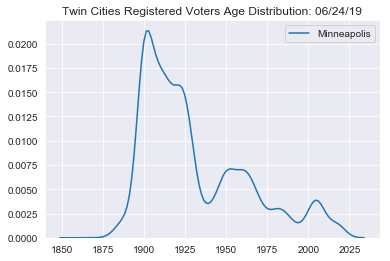

In [200]:
import requests # library to handle requests
import folium
import seaborn as sns
import scipy.stats as stats #used to get correlation coefficient

#Create an Age column


#Graphing using seaborn
sns.set_style("darkgrid") #white, white-grid, ticks
ax= sns.kdeplot(MS1.YearBuilt, label='Minneapolis')


ax.set_title('Twin Cities Registered Voters Age Distribution: 06/24/19')

#Save Graph
figure = ax.get_figure()    
figure.savefig('RegisterVoterDistribution.png', dpi=400)



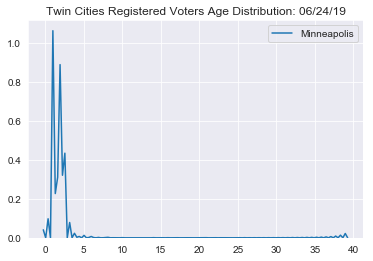

In [208]:
#Graphing using seaborn
sns.set_style("darkgrid") #white, white-grid, ticks
ax= sns.kdeplot(MS1.Num_Stories, label='Minneapolis')
#ax= sns.kdeplot(MS1.query('Num_Stories<5'), label='Minneapolis')

ax.set_title('Twin Cities Registered Voters Age Distribution: 06/24/19')

#Save Graph
figure = ax.get_figure()  

In [225]:
MS1['Num_Stories'].value_counts()

MS1['Bldg_Use'].value_counts() #702 multiuse
MS1['Neighborhood'].value_counts()
MS1['Community'].value_counts()
MS1['Property_Type'].value_counts()
MS1['LandUse'].value_counts() # this is better

#'Mult_Use','Is_Exempt','Num_Bldgs','Bldg_Use',
#'Construction','Exterior','Tot_Units', 'Bathrooms','Bedrooms'
#'Neighborhood', 'Community', 'Ward','Zoning','LandUse','Area','Property_Type',

MULTI-FAMILY RESIDENTIAL     8117
SINGLE-FAMILY DETACHED DW    6718
MULTI-FAMILY APARTMENT       2854
SINGLE-FAMILY ATTACHED DW    2728
MIXED OFFICE,RETAIL,RESID     345
GROUP RESIDENCE                34
SHORT TERM RENTAL              28
VACANT LAND                    21
COMMON AREA                    17
GARAGE OR MISC RESID STRU      12
RETAIL                          8
OFFICE STRUCTURE                7
COL COMMUNITY LAND TRUST        7
INSTITUTIONS:SCHL,COLLEGE       7
BAR,RESTAURANT,CLUB             2
IND WAREHOUSE FACTORY           1
COMM WORK SHOP                  1
Name: LandUse, dtype: int64

In [109]:
ren.communityDesc.unique()

#Community 11

array(['Southwest', 'Camden', 'Near North', 'University', 'Longfellow',
       'Central', 'Northeast', 'Powderhorn', 'Calhoun Isle', 'Nokomis',
       nan, 'Phillips'], dtype=object)

In [107]:
ren.query('communityDesc=="nan"')

,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,neighborhoodDesc,communityDesc,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay


In [115]:
ErrCommunityDesc= ren[ren['communityDesc'].isnull()] # 235 & ward is null

l=ren.query('latitude==0')
ErrCoordinates= l[l['communityDesc'].notnull()] #16 Missing Coordinates

ren[ren['ward'].isnull()]


,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,neighborhoodDesc,communityDesc,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay
93,CHOWNEXMPT,Active,LIC131317,License Re,Tier 1,2017/06/15 16:32:31+00,2022/03/01 00:00:00+00,2100 DUPONT AVE N,Chad Schwitters,2015 Emerson Avenue North,...,NaN,NaN,45.00038,-93.29221,2022-03-01 00:00:00+00:00,2022,6/15/2017,2017,6,15
152,CHOWN,Active,LIC130318,Active,Tier 1,2014/09/19 08:45:42+00,2023/03/01 00:00:00+00,500 RUSSELL AVE N,SCOTT H MOEN,507 SHERIDAN AVE N,...,NaN,NaN,44.98284,-93.31065,2023-03-01 00:00:00+00:00,2023,9/19/2014,2014,9,19
276,CONVEXEMPT,Active,LIC397547,License Re,Tier 1D,2021/11/17 12:28:56+00,2022/03/01 00:00:00+00,1240 2ND ST S #825,Katrisha N Neisse,287 Owasso Blvd N,...,NaN,NaN,0.00000,0.00000,2022-03-01 00:00:00+00:00,2022,11/17/2021,2021,11,17
476,CONVEXEMPT,Active,LIC397212,Active,Tier 1,2021/10/25 18:52:41+00,2023/03/01 00:00:00+00,1240 2ND ST S #615,Taylor Reiners,3350 Tyler St NE,...,NaN,NaN,0.00000,0.00000,2023-03-01 00:00:00+00:00,2023,10/25/2021,2021,10,25
504,CHOWNEXMPT,Active,LIC396809,Active,Tier 1,2021/10/13 12:10:16+00,2023/03/01 00:00:00+00,1240 2ND ST S #1227,Jennifer Viedma,4245 Alden Drive,...,NaN,NaN,0.00000,0.00000,2023-03-01 00:00:00+00:00,2023,10/13/2021,2021,10,13
534,CHOWN,Active,LIC397464,Active,Tier 1,2022/01/04 10:06:24+00,2023/03/01 00:00:00+00,5050 HIAWATHA AVE,Kurtis Waters,10004 Island Dr,...,NaN,NaN,0.00000,0.00000,2023-03-01 00:00:00+00:00,2023,1/4/2022,2022,1,4
574,ShrtTrmLic,Active,LIC399466,Active,Tier 1,2022/01/21 13:49:14+00,2023/03/01 00:00:00+00,117 27TH AVE SE,Chris Elsey,"1532 College Ave, Apt F19",...,NaN,NaN,44.96953,-93.22084,2023-03-01 00:00:00+00:00,2023,1/21/2022,2022,1,21
653,ShrtTrmLic,Active,LIC399600,Active,Tier 1,2022/02/07 14:06:04+00,2023/03/01 00:00:00+00,150 26TH AVE SE,MAXWELL VENTURES LLC,ATTN: PATRICK J SMITH,...,NaN,NaN,44.97112,-93.22046,2023-03-01 00:00:00+00:00,2023,2/7/2022,2022,2,7
801,CHOWNEXMPT,Active,LIC131555,Active,Tier 1,2005/11/15 11:36:52+00,2023/03/01 00:00:00+00,2020 1ST ST S #61,WEST BANK COMMUNITY DEV CORP,1808 RIVERSIDE AVE S STE 201,...,NaN,NaN,44.97568,-93.24300,2023-03-01 00:00:00+00:00,2023,11/15/2005,2005,11,15
1450,CHOWNEXMPT,Active,LIC132471,Active,Tier 1,2015/08/31 06:53:33+00,2023/03/01 00:00:00+00,401 2ND ST N #509,JOHN R OSTWALD,5900 OXFORD ST # 11,...,NaN,NaN,0.00000,0.00000,2023-03-01 00:00:00+00:00,2023,8/31/2015,2015,8,31


In [114]:
ren.ward.unique()

array([13.,  4.,  5.,  2., 12.,  3.,  1.,  7., 10.,  9., 11.,  8., nan,
        6.])

In [105]:
ren.query('milestone=="Delinquent"')
#f.query('ExpYear==2022')

# Fees 11 entries; 899 - Delinquent,  3 -'Closed', 8- Reiview
# Status In-Process (Fees+Review)
#"2810 JAMES AVE N"
#ren.query("address=='2810 JAMES AVE N'")

,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,communityDesc,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay,dex
11993,CHOWNEXMPT,Active,LIC173621,Delinquent,Tier 1,1999/09/14 00:00:00+00,2022/03/01 16:29:00+00,2700 PARK AVE,MARK THOMAS,2722 PARK AVE S,...,Phillips,44.95336,-93.26583,2022-03-01 16:29:00+00:00,2022,9/14/1999,1999,9,14,1
17612,CONV,Active,LIC372624,Delinquent,Tier 1,2018/09/25 15:33:21+00,2022/03/01 00:00:00+00,2301 BRYANT AVE S,Bright Spot #2 LLC,2301 Bryant Ave S,...,Calhoun Isle,44.95997,-93.29019,2022-03-01 00:00:00+00:00,2022,9/25/2018,2018,9,25,1


In [57]:
#Convert Date to Datetime!
from datetime import datetime

ren['ExpDate']= pd.to_datetime(ren['expirationDate']) # Create new column called DateTime
ren['ExpYear']= ren['ExpDate'].dt.year #create year column
ren['IssDate']= pd.to_datetime(ren['issueDate']) # Create new column called DateTime
ren['IssYear']= ren['IssDate'].dt.year #create year column
ren['IssMonth'] = ren['IssDate'].dt.month # Create Month Category
ren['IssDay'] = ren['IssDate'].dt.day #Create Day of the Current month
ren['IssDate']= ren['IssMonth'].astype(str) + '/' + ren['IssDay'].astype(str) + '/' + ren['IssYear'].astype(str)



#ren.ExpYear.unique()


#ren.query("expirationDate=='2021/03/01 00:00:00+00'")
# \92 2019/08/31 ; 537 2021, 

ren.query('ExpYear==2023')

#9418; approximately all license Re for milstone have exp 2022 and two delinquent 



,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,neighborhoodDesc,communityDesc,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay
0,CONV,Active,LIC385097,Active,Tier 1,2019/11/07 10:03:49+00,2023/03/01 00:00:00+00,5924 OLIVER AVE S,Amy A Smith,1701 W 143rd St. #414,...,Armatage,Southwest,44.89592,-93.30775,2023-03-01 00:00:00+00:00,2023,11/7/2019,2019,11,7
1,CONV,Active,LIC375543,Active,Tier 1,2019/01/07 08:11:35+00,2023/03/01 00:00:00+00,5013 ALDRICH AVE N,Dwayne Meier,605 Hwy 169 N,...,Lind - Bohanon,Camden,45.04628,-93.29056,2023-03-01 00:00:00+00:00,2023,1/7/2019,2019,1,7
3,CHOWN,Active,LIC392462,Active,Tier 1,2020/12/23 16:57:30+00,2023/03/01 00:00:00+00,2001 GLENWOOD AVE,RYAN S DAVIS,2001 GLENWOOD AVENUE #2,...,Harrison,Near North,44.98047,-93.30582,2023-03-01 00:00:00+00:00,2023,12/23/2020,2020,12,23
5,CONV,Active,LIC390318,Active,Tier 1,2020/07/27 09:11:06+00,2023/03/01 00:00:00+00,923 25TH AVE SE,Gonzalo J Bellido,4631 Parksidge Dr,...,Como,University,44.98742,-93.21799,2023-03-01 00:00:00+00:00,2023,7/27/2020,2020,7,27
6,CHOWN,Active,LIC392622,Active,Tier 1,2021/01/25 13:55:04+00,2023/03/01 00:00:00+00,4647 BRYANT AVE N,Rada Varshavskaya,5808 Olinger Blvd,...,Lind - Bohanon,Camden,45.03981,-93.29181,2023-03-01 00:00:00+00:00,2023,1/25/2021,2021,1,25
7,CHOWN,Active,LIC372576,Active,Tier 1,2018/09/24 15:52:43+00,2023/03/01 00:00:00+00,3645 FREMONT AVE N,MARGITO SANMARTIN,2313 BLOOMINGTON AVE,...,Folwell,Camden,45.02171,-93.29597,2023-03-01 00:00:00+00:00,2023,9/24/2018,2018,9,24
8,CHOWN,Active,LIC393445,Active,Tier 1,2021/03/25 12:17:37+00,2023/03/01 00:00:00+00,3117 38TH ST E,Daniel Riley,3330 Edmund Blvd,...,Howe,Longfellow,44.93392,-93.22625,2023-03-01 00:00:00+00:00,2023,3/25/2021,2021,3,25
11,CONVEXEMPT,Active,LIC388483,Active,Tier 1,2020/03/12 08:37:30+00,2023/03/01 00:00:00+00,315 WEST RIVER PKWY N #105,Tracie Rohlf,8809 E Hidden Valley Rd,...,North Loop,Central,44.98805,-93.26815,2023-03-01 00:00:00+00:00,2023,3/12/2020,2020,3,12
15,CHOWN,Active,LIC392228,Active,Tier 1,2020/12/04 10:40:44+00,2023/03/01 00:00:00+00,4201 21ST AVE S,Jasmine Radue,3412 Meridian Dr,...,Standish,Powderhorn,44.92675,-93.24188,2023-03-01 00:00:00+00:00,2023,12/4/2020,2020,12,4
20,CHOWN,Active,LIC371777,Active,Tier 1,2018/10/30 16:01:49+00,2023/03/01 00:00:00+00,2520 PIERCE ST NE,Philip Chan,1910 Quincy St NE,...,Audubon Park,Northeast,45.01393,-93.24133,2023-03-01 00:00:00+00:00,2023,10/30/2018,2018,10,30


In [102]:
# group by

ren['dex']=1
p=['dex', 'address']

z=ren[p].groupby(['address']).sum()
z.dex.unique()
z.query('dex==2')


# 109 MARQUETTE AVE ; #1621 6TH ST NE , #4228 DELAWARE ST SE
# 1126 JEFFERSON ST NE (85 entries)

#ren.query('address=="1621 6TH ST NE"')

,dex
address,
1126 JEFFERSON ST NE,2
113 26TH ST E,2
117 27TH AVE SE,2
120 2ND ST N,2
1300 LAKE ST W,2
1302 DOUGLAS AVE,2
1417 5TH ST NE,2
150 26TH AVE SE,2
1510 EMERSON AVE N,2


In [71]:
ren.query('licenseNumber=="LIC389668"') 

,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay,index,dex
280,ShrtTrmLic,Active,LIC389668,License Re,Tier 1,2021/11/10 10:33:32+00,2022/03/01 00:00:00+00,109 MARQUETTE AVE,Thomas F Moran,2734 Lincoln,...,44.98222,-93.26498,2022-03-01 00:00:00+00:00,2022,11/10/2021,2021,11,10,1,1
281,ShrtTrmLic,Active,LIC389668,License Re,Tier 1,2021/11/10 10:33:32+00,2022/03/01 00:00:00+00,109 MARQUETTE AVE,Thomas F Moran,2734 Lincoln,...,44.98222,-93.26498,2022-03-01 00:00:00+00:00,2022,11/10/2021,2021,11,10,1,1


In [72]:
ren.drop_duplicates(keep=False)

,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay,index,dex
0,CONV,Active,LIC385097,Active,Tier 1,2019/11/07 10:03:49+00,2023/03/01 00:00:00+00,5924 OLIVER AVE S,Amy A Smith,1701 W 143rd St. #414,...,44.89592,-93.30775,2023-03-01 00:00:00+00:00,2023,11/7/2019,2019,11,7,1,1
1,CONV,Active,LIC375543,Active,Tier 1,2019/01/07 08:11:35+00,2023/03/01 00:00:00+00,5013 ALDRICH AVE N,Dwayne Meier,605 Hwy 169 N,...,45.04628,-93.29056,2023-03-01 00:00:00+00:00,2023,1/7/2019,2019,1,7,1,1
2,CONVEXEMPT,Active,LIC392965,License Re,Tier 1,2021/07/02 10:00:43+00,2022/03/01 00:00:00+00,3434 LYNDALE AVE N,Iris Martinez,3434 LYNDALE AVE N,...,45.01772,-93.28760,2022-03-01 00:00:00+00:00,2022,7/2/2021,2021,7,2,1,1
3,CHOWN,Active,LIC392462,Active,Tier 1,2020/12/23 16:57:30+00,2023/03/01 00:00:00+00,2001 GLENWOOD AVE,RYAN S DAVIS,2001 GLENWOOD AVENUE #2,...,44.98047,-93.30582,2023-03-01 00:00:00+00:00,2023,12/23/2020,2020,12,23,1,1
4,CONV,Active,LIC390040,License Re,Tier 1,2020/06/25 15:19:01+00,2022/03/01 00:00:00+00,2311 LYNDALE AVE N,Alexander Gladkov,2905 STRATTON CIRCLE,...,45.00301,-93.28842,2022-03-01 00:00:00+00:00,2022,6/25/2020,2020,6,25,1,1
5,CONV,Active,LIC390318,Active,Tier 1,2020/07/27 09:11:06+00,2023/03/01 00:00:00+00,923 25TH AVE SE,Gonzalo J Bellido,4631 Parksidge Dr,...,44.98742,-93.21799,2023-03-01 00:00:00+00:00,2023,7/27/2020,2020,7,27,1,1
6,CHOWN,Active,LIC392622,Active,Tier 1,2021/01/25 13:55:04+00,2023/03/01 00:00:00+00,4647 BRYANT AVE N,Rada Varshavskaya,5808 Olinger Blvd,...,45.03981,-93.29181,2023-03-01 00:00:00+00:00,2023,1/25/2021,2021,1,25,1,1
7,CHOWN,Active,LIC372576,Active,Tier 1,2018/09/24 15:52:43+00,2023/03/01 00:00:00+00,3645 FREMONT AVE N,MARGITO SANMARTIN,2313 BLOOMINGTON AVE,...,45.02171,-93.29597,2023-03-01 00:00:00+00:00,2023,9/24/2018,2018,9,24,1,1
8,CHOWN,Active,LIC393445,Active,Tier 1,2021/03/25 12:17:37+00,2023/03/01 00:00:00+00,3117 38TH ST E,Daniel Riley,3330 Edmund Blvd,...,44.93392,-93.22625,2023-03-01 00:00:00+00:00,2023,3/25/2021,2021,3,25,1,1
9,CHOWN,Active,LIC382697,License Re,Tier 1,2019/10/04 11:29:35+00,2022/03/01 00:00:00+00,627 QUEEN AVE N,Victoria Yepez,7900 Telegraph Rd,...,44.98510,-93.31007,2022-03-01 00:00:00+00:00,2022,10/4/2019,2019,10,4,1,1


In [73]:
ren

,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay,index,dex
0,CONV,Active,LIC385097,Active,Tier 1,2019/11/07 10:03:49+00,2023/03/01 00:00:00+00,5924 OLIVER AVE S,Amy A Smith,1701 W 143rd St. #414,...,44.89592,-93.30775,2023-03-01 00:00:00+00:00,2023,11/7/2019,2019,11,7,1,1
1,CONV,Active,LIC375543,Active,Tier 1,2019/01/07 08:11:35+00,2023/03/01 00:00:00+00,5013 ALDRICH AVE N,Dwayne Meier,605 Hwy 169 N,...,45.04628,-93.29056,2023-03-01 00:00:00+00:00,2023,1/7/2019,2019,1,7,1,1
2,CONVEXEMPT,Active,LIC392965,License Re,Tier 1,2021/07/02 10:00:43+00,2022/03/01 00:00:00+00,3434 LYNDALE AVE N,Iris Martinez,3434 LYNDALE AVE N,...,45.01772,-93.28760,2022-03-01 00:00:00+00:00,2022,7/2/2021,2021,7,2,1,1
3,CHOWN,Active,LIC392462,Active,Tier 1,2020/12/23 16:57:30+00,2023/03/01 00:00:00+00,2001 GLENWOOD AVE,RYAN S DAVIS,2001 GLENWOOD AVENUE #2,...,44.98047,-93.30582,2023-03-01 00:00:00+00:00,2023,12/23/2020,2020,12,23,1,1
4,CONV,Active,LIC390040,License Re,Tier 1,2020/06/25 15:19:01+00,2022/03/01 00:00:00+00,2311 LYNDALE AVE N,Alexander Gladkov,2905 STRATTON CIRCLE,...,45.00301,-93.28842,2022-03-01 00:00:00+00:00,2022,6/25/2020,2020,6,25,1,1
5,CONV,Active,LIC390318,Active,Tier 1,2020/07/27 09:11:06+00,2023/03/01 00:00:00+00,923 25TH AVE SE,Gonzalo J Bellido,4631 Parksidge Dr,...,44.98742,-93.21799,2023-03-01 00:00:00+00:00,2023,7/27/2020,2020,7,27,1,1
6,CHOWN,Active,LIC392622,Active,Tier 1,2021/01/25 13:55:04+00,2023/03/01 00:00:00+00,4647 BRYANT AVE N,Rada Varshavskaya,5808 Olinger Blvd,...,45.03981,-93.29181,2023-03-01 00:00:00+00:00,2023,1/25/2021,2021,1,25,1,1
7,CHOWN,Active,LIC372576,Active,Tier 1,2018/09/24 15:52:43+00,2023/03/01 00:00:00+00,3645 FREMONT AVE N,MARGITO SANMARTIN,2313 BLOOMINGTON AVE,...,45.02171,-93.29597,2023-03-01 00:00:00+00:00,2023,9/24/2018,2018,9,24,1,1
8,CHOWN,Active,LIC393445,Active,Tier 1,2021/03/25 12:17:37+00,2023/03/01 00:00:00+00,3117 38TH ST E,Daniel Riley,3330 Edmund Blvd,...,44.93392,-93.22625,2023-03-01 00:00:00+00:00,2023,3/25/2021,2021,3,25,1,1
9,CHOWN,Active,LIC382697,License Re,Tier 1,2019/10/04 11:29:35+00,2022/03/01 00:00:00+00,627 QUEEN AVE N,Victoria Yepez,7900 Telegraph Rd,...,44.98510,-93.31007,2022-03-01 00:00:00+00:00,2022,10/4/2019,2019,10,4,1,1


In [96]:
#Error Sheet

# group by

ren['dex']=1
p=['dex', 'address']

z=ren[p].groupby(['address']).sum()
z.dex.unique()
b=z.query('dex==2')
b=b.reset_index()
DupAddress= pd.merge(ren, b, on='address', how='right')






In [98]:
DupAddress

,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,latitude,longitude,ExpDate,ExpYear,IssDate,IssYear,IssMonth,IssDay,dex_x,dex_y
0,CHOWN,Active,LIC391504,License Re,Tier 1,2020/10/07 15:51:16+00,2022/03/01 00:00:00+00,1704 1/2 FILLMORE ST NE,MRK Properties LLC,2701 Georgia Ave S,...,45.00516,-93.24266,2022-03-01 00:00:00+00:00,2022,10/7/2020,2020,10,7,1,2
1,CHOWNEXMPT,Active,LIC131384,Delinquent,Tier 1,2004/06/28 12:17:17+00,2021/03/01 00:00:00+00,1704 1/2 FILLMORE ST NE,ROBERT DORIAN VANDEVEER,1052 93RD LN NW,...,45.00516,-93.24266,2021-03-01 00:00:00+00:00,2021,6/28/2004,2004,6,28,1,2
2,CHOWN,Active,LIC398743,Active,Tier 1,2021/12/03 21:38:53+00,2023/03/01 00:00:00+00,3124 TYLER ST NE,SARA SPSIESS,3124 TYLER ST NE,...,45.02481,-93.24642,2023-03-01 00:00:00+00:00,2023,12/3/2021,2021,12,3,1,2
3,CHOWN,Active,LIC324421,Delinquent,Tier 1,2013/07/03 16:20:31+00,2021/03/01 00:00:00+00,3124 TYLER ST NE,SHALO L MROZEK,3124 TYLER ST NE,...,45.02481,-93.24642,2021-03-01 00:00:00+00:00,2021,7/3/2013,2013,7,3,1,2
4,CHOWNEXMPT,Active,LIC399472,Active,Tier 1,2022/01/24 09:42:26+00,2023/03/01 00:00:00+00,813 LAKE ST W,NaN,NaN,...,44.94813,-93.29011,2023-03-01 00:00:00+00:00,2023,1/24/2022,2022,1,24,1,2
5,ShrtTrmLic,Active,LIC142334,Active,Tier 1,1999/09/28 00:00:00+00,2023/03/01 00:00:00+00,813 LAKE ST W,JENNIFER SIMS OLSON,3328 46TH AVE S,...,44.94813,-93.29011,2023-03-01 00:00:00+00:00,2023,9/28/1999,1999,9,28,1,2
6,ShrtTrmLic,Active,LIC396982,Active,Tier 1,2021/10/12 10:05:04+00,2023/03/01 00:00:00+00,819 24TH AVE NE,Matthew K Held,1749 17th Ave NW,...,45.01243,-93.24981,2023-03-01 00:00:00+00:00,2023,10/12/2021,2021,10,12,1,2
7,CHOWN,Active,LIC388087,Active,Tier 1,2020/02/14 13:28:07+00,2023/03/01 00:00:00+00,819 24TH AVE NE,Matthew K Held,1749 17th Ave NW,...,45.01243,-93.24981,2023-03-01 00:00:00+00:00,2023,2/14/2020,2020,2,14,1,2
8,ShrtTrmLic,Active,LIC396993,Active,Tier 1,2021/10/12 14:22:39+00,2023/03/01 00:00:00+00,677 13TH AVE NE,Susan Terwey,677 13th Ave NE #1,...,45.00117,-93.25400,2023-03-01 00:00:00+00:00,2023,10/12/2021,2021,10,12,1,2
9,CHOWNEXMPT,Active,LIC148322,Active,Tier 1,1999/09/14 00:00:00+00,2023/03/01 00:00:00+00,677 13TH AVE NE,Nicholas Pederson,677 13th Ave NE #1,...,45.00117,-93.25400,2023-03-01 00:00:00+00:00,2023,9/14/1999,1999,9,14,1,2


In [363]:
dols= ['address','Zip5','Build','Sale_Date','Market_Value','Parcel_ID','Condo']
Hen=b[dols]

#Merging

p=['category','status','licenseNumber','milestone','tier', 'LicIssueDate','LicExpDate', 'address', 'ownerName', 'ownerState', 'ownerPhone', 'ownerEmail', 'applicantName', 'applicantPhone', 'applicantEmail', 'licensedUnits', 'ward', 'neighborhoodDesc', 'communityDesc', 'latitude', 'longitude']       
test=['LicIssueDate','LicExpDate', 'address']
m= ren[test]
m['address']= m['address'].str.replace(' TERR',' TER')

Mas= pd.merge(Hen, m, on='address', how='right')

#Mas.head(4)

#Hen.head(4)

# Sample address 2828 28TH AVE S

#7700

#Mas

fy=Mas[Mas['Zip5'].isnull()]
fy=fy[test]

#def Unit(x): 
#    if x.bool():
#        return ''
#    else: 
#        return ' #' + x.astype(str)

Hen1=Hen
Hen1['address']= Hen['address'] + ' #' + Hen['Condo']


#splits the dictionary to two listed values which are treated as stings
#new=fy['address'].str.split("#", n = 1, expand = True) 
#fy['address']=new[0]

#3552 left 

Mas1=pd.merge(Hen1, fy, on='address', how='right')

py= Mas1[Mas1['Zip5'].isnull()]
py=py[test]

Mas2=pd.merge(Hen1, py, on='address', how='right')
Mas2[Mas2['Zip5'].isnull()]

#1035
#1005
#984

#Mas1[Mas1['Zip5'].isnull()]
#fy
#Hen1

,address,Zip5,Build,Sale_Date,Market_Value,Parcel_ID,Condo,LicIssueDate,LicExpDate
0,315 WEST RIVER PKWY N #105,NaN,NaN,NaN,NaN,NaN,NaN,3/12/2020,03/01/2023
1,1704 1/2 FILLMORE ST NE,NaN,NaN,NaN,NaN,NaN,NaN,10/7/2020,03/01/2022
2,1513 35TH ST E,NaN,NaN,NaN,NaN,NaN,NaN,6/10/2019,03/01/2022
3,1320 CENTRAL AVE NE,NaN,NaN,NaN,NaN,NaN,NaN,2/14/2014,03/01/2022
4,429 2ND ST NE #101,NaN,NaN,NaN,NaN,NaN,NaN,9/20/2005,03/01/2023
5,935 19TH AVE SE,NaN,NaN,NaN,NaN,NaN,NaN,1/26/2022,03/01/2023
6,2532 1ST AVE S #204,NaN,NaN,NaN,NaN,NaN,NaN,1/3/2022,03/01/2023
7,3126 EMERSON AVE S,NaN,NaN,NaN,NaN,NaN,NaN,10/12/2021,03/01/2023
8,3403 GARFIELD ST NE,NaN,NaN,NaN,NaN,NaN,NaN,8/5/2021,03/01/2023
9,3606 34TH AVE S,NaN,NaN,NaN,NaN,NaN,NaN,11/17/2021,03/01/2022


In [369]:
#a[a['address'].str.contains('2820 SAINT LOUIS AVE', na=False)]
ren[ren['address'].str.contains('2820 SAINT LOUIS AVE', na=False)]


,category,status,licenseNumber,milestone,tier,issueDate,expirationDate,address,ownerName,ownerAddress1,...,ExpDate,ExpYear,ExpMonth,ExpDay,LicExpDate,IssDate,IssYear,IssMonth,IssDay,LicIssueDate
22501,CONVEXEMPT,Active,LIC393358,License Re,Tier 1,2021/04/08 15:36:32+00,2022/03/01 00:00:00+00,2820 SAINT LOUIS AVE,Elizabeth Collins,3407 W 28th St,...,2022-03-01 00:00:00+00:00,2022,3,1,03/01/2022,2021-04-08 15:36:32+00:00,2021,4,8,4/8/2021


In [283]:
Hen.query('"28TH AVE S" in address')

Hen[Hen['address'].str.contains('442 BUCHANAN', na=False)]

,address,Zip5,Build,Sale_Date,Market_Value,Parcel_ID
55984,442 BUCHANAN ST NE,55413,0,199206,1100,1302924340016
55985,442 BUCHANAN ST NE,55413,1900,201808,195000,1302924340017


In [ ]:
#2840 28TH AVE S

In [236]:
Hen[Hen['address'].str.contains('20 2ND ST', na=False)]

,address,Zip5,Build,Sale_Date,Market_Value,Parcel_ID,dex
44023,2220 2ND ST N E,55418,1900,201704,297500,1102924320167,1
44091,1820 2ND ST N E,55418,1900,201811,269000,1102924330074,1
60067,1320 2ND ST N E,55413,1923,201605,358500,1402924230043,1
64788,2020 2ND ST N,55411,1941,,905000,1502924240022,1
94497,220 2ND ST N E,55413,1986,201907,371000,2302924210393,1
94774,20 2ND ST N E,55413,1983,202107,83500,2302924210729,1
94775,20 2ND ST N E,55413,1983,201903,124000,2302924210730,1
94776,20 2ND ST N E,55413,1983,201804,91000,2302924210731,1
94777,20 2ND ST N E,55413,1983,200809,145500,2302924210732,1
94778,20 2ND ST N E,55413,1983,202103,74000,2302924210733,1


In [244]:
#2641 RANDOLPH ST NE

Hen.query('address=="2641 RANDOLPH ST NE"')

Hen[Hen['address'].str.contains('1513 35TH', na=False)]

,address,Zip5,Build,Sale_Date,Market_Value,Parcel_ID,dex
